In [3]:
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

In [7]:
# DGP
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_c = np.c_[np.ones((100, 1)), X] # add constant column

C:\Users\cjrdn_000\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


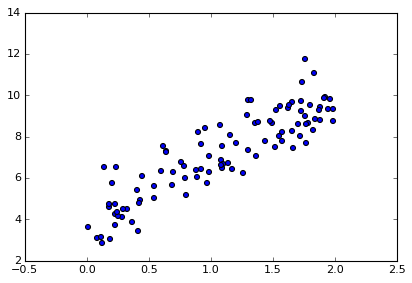

In [13]:
plt.scatter(X, y)
plt.show()

In [126]:
lr = 0.1 #learning rate
n_iterations = 10000
m = 100 # observation count

In [127]:
Θ = np.random.randn(2, 1) # random initialization of Θ

for iteration in range(n_iterations):
    gradients = 2/m * X_c.T.dot(X_c.dot(Θ) - y) # vector of partials given Θ
    Θ = Θ - lr * gradients # stepwise adjustment

In [128]:
Θ_iteration = Θ
Θ_iteration

array([[3.90530804],
       [3.01467963]])

In [129]:
x_fit = np.array([0, max(X)])
y_fit = np.array([Θ[0][0], Θ[0][0] + Θ[1][0] * max(X)])

C:\Users\cjrdn_000\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


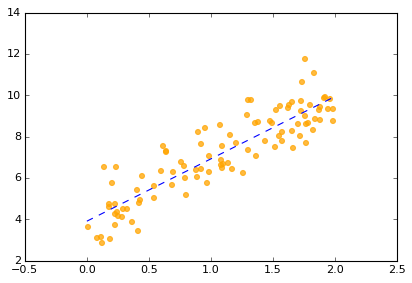

In [130]:
plt.plot(x_fit, y_fit, linestyle='dashed', color='blue')
plt.scatter(X, y, alpha=0.75, color='orange')
plt.show()

In [131]:
X.shape[0]

100

In [138]:
def mse(X, y, Θ):
    
    y_hat = [Θ.T.dot(row) for row in X]
    MSE = ((y_hat - y) ** 2).mean(axis=None)
    
    return MSE

In [162]:
def descend(X, y, Θ, learning_rate, PREV_MSE=999999):
    
    MSE = mse(X, y, Θ)
    if abs(MSE - PREV_MSE) < 0.00000001:
        
        return Θ
    
    else:
        
        gradients = (2/ X.shape[0]) * X.T.dot(X.dot(Θ) - y)
        Θ = Θ - learning_rate * gradients
        return descend(X, y, Θ, learning_rate, PREV_MSE=MSE)
    

In [174]:
Θ = np.random.randn(2, 1) # random initialization of Θ

In [176]:
Θ_recursion = descend(X_c, y, Θ, 0.03)

In [177]:
print(Θ_recursion, '\n', Θ_iteration)

[[3.9038248 ]
 [3.01584217]] 
 [[3.90530804]
 [3.01467963]]


In [178]:
x_fit = np.array([0, max(X)])
y_fit = np.array([Θ_recursion[0][0], Θ_recursion[0][0] + Θ_recursion[1][0] * max(X)])

C:\Users\cjrdn_000\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


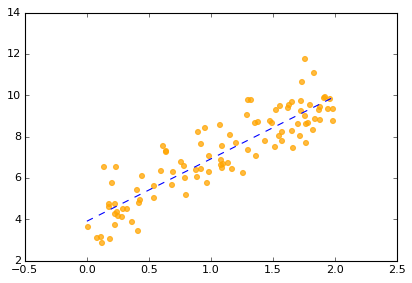

In [179]:
plt.plot(x_fit, y_fit, linestyle='dashed', color='blue')
plt.scatter(X, y, alpha=0.75, color='orange')
plt.show()